In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Generate the data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

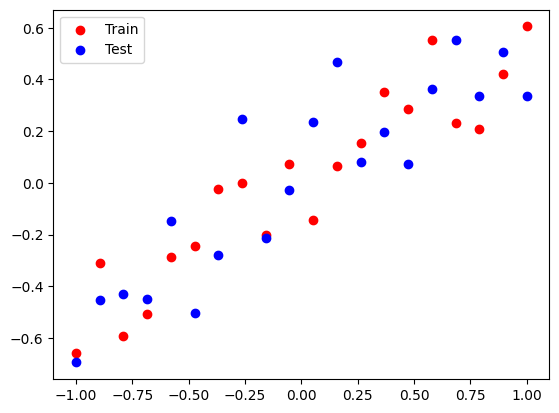

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

Without use dropout layers

In [7]:
model_1 = Sequential()

In [8]:
model_1.add(Dense(128, input_dim = 1, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='linear'))


adam = Adam(learning_rate=0.01)

d:\DL(campus_x)\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_1.compile(loss='mse', optimizer='adam', metrics = ['mse'])

In [19]:
history = model_1.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test), verbose=2)

Epoch 1/500
1/1 - 0s - 165ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 2/500
1/1 - 0s - 144ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 3/500
1/1 - 0s - 148ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 4/500
1/1 - 0s - 121ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 5/500
1/1 - 0s - 188ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 6/500
1/1 - 0s - 138ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 7/500
1/1 - 0s - 123ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 8/500
1/1 - 0s - 145ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 9/500
1/1 - 0s - 122ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 10/500
1/1 - 0s - 140ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0387 - val_mse: 0.0387

In [20]:
# evaluate the model 
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)

print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.006293920334428549, Test: 0.04387761279940605


In [21]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


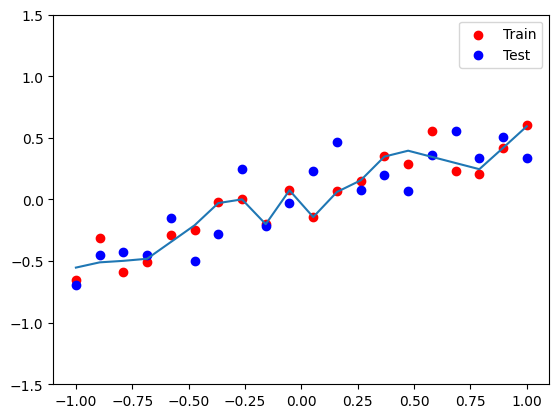

In [22]:
plt.Figure()
plt.scatter(X_train, y_train, c = 'red', label = 'Train')
plt.scatter(X_test, y_test, c = 'blue', label = 'Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

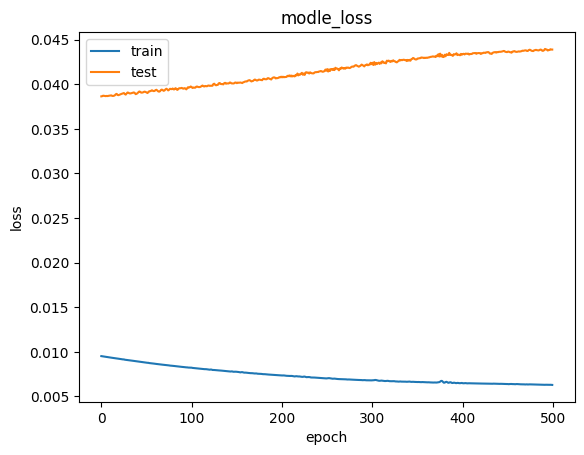

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("modle_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'], loc = 'upper left')
plt.show()

After adding dropout layers

In [24]:
model_2 = Sequential()

In [25]:
model_2.add(Dense(128, input_dim = 1, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='linear'))


adam = Adam(learning_rate=0.01)

d:\DL(campus_x)\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model_2.compile(loss='mse', optimizer='adam', metrics = ['mse'])

In [27]:
droput_history_2 = model_2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=2)

Epoch 1/500
1/1 - 3s - 3s/step - loss: 0.1280 - mse: 0.1280 - val_loss: 0.1232 - val_mse: 0.1232
Epoch 2/500
1/1 - 0s - 131ms/step - loss: 0.0977 - mse: 0.0977 - val_loss: 0.1072 - val_mse: 0.1072
Epoch 3/500
1/1 - 0s - 175ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.0932 - val_mse: 0.0932
Epoch 4/500
1/1 - 0s - 148ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 5/500
1/1 - 0s - 139ms/step - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 6/500
1/1 - 0s - 153ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 7/500
1/1 - 0s - 158ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 8/500
1/1 - 0s - 135ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 9/500
1/1 - 0s - 148ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 10/500
1/1 - 0s - 162ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0368 - val_mse: 0.0368
Ep

In [28]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)

print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.014790527522563934, Test: 0.03156937286257744


In [29]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


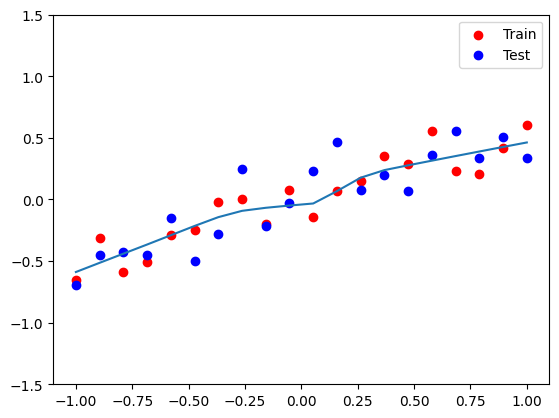

In [30]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label = 'Train')
plt.scatter(X_test, y_test, c = 'blue', label = 'Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

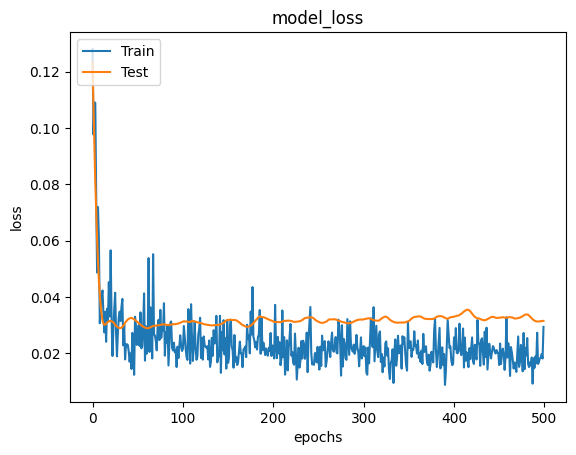

In [31]:
plt.plot(droput_history_2.history['loss'])
plt.plot(droput_history_2.history['val_loss'])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


In [ ]:
# when we increase the drop out layers it can be reduce the overfitting and decraseing the loss value of test data